In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


In [ ]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('mail_data.csv')

In [ ]:
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
raw_mail_data.value_counts('Category')

Category
ham     4825
spam     747
dtype: int64

In [ ]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
# label spam mail as 0;  inbox mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1
# mail_data.value_counts('Category')


In [ ]:
# separating the data as texts and label
X = mail_data['Message']
Y = mail_data['Category']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

Feature Extraction

In [ ]:
# # transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Training the Model with Navi Bays

In [ ]:
model = MultinomialNB()

Evaluating the trained model

In [ ]:
# prediction on training data
model.fit(X_train_features, Y_train)
MultinomialNB_model=model.fit(X_train_features, Y_train)

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)
confusion_matrix(Y_train, prediction_on_training_data)

Accuracy on training data :  0.9820507067534215


array([[ 514,   80],
       [   0, 3863]])

Evaluating the Test model

In [ ]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on Test data : ', accuracy_on_test_data)
confusion_matrix(Y_test, prediction_on_test_data)

Accuracy on Test data :  0.9730941704035875


array([[123,  30],
       [  0, 962]])

Building a Predictive System

In [ ]:
# input_mail = ["URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

# # convert text to feature vectors
# input_data_features = feature_extraction.transform(input_mail)

# # making prediction

# prediction = model.predict(input_data_features)


# if (prediction[0]==1):
#   print('Prediction: Inbox mail')

# else:
#   print('Prediction: Spam mail')

**Data Analysis**

**Traning Data Analysis**

In [ ]:
  accuracy_value= accuracy_on_training_data*100
  precision_value = precision_score(Y_train, prediction_on_training_data)*100
  recall_value = recall_score(Y_train, prediction_on_training_data)*100
  f1_score_value = f1_score(Y_train, prediction_on_training_data)*100

  print('Accuracy =',accuracy_value,'%')
  print('Precision =',precision_value,'%')
  print('Recall =',recall_value,'%')
  print('F1 Score =',f1_score_value,'%')

Accuracy = 98.20507067534216 %
Precision = 97.97108800405783 %
Recall = 100.0 %
F1 Score = 98.97514732257238 %


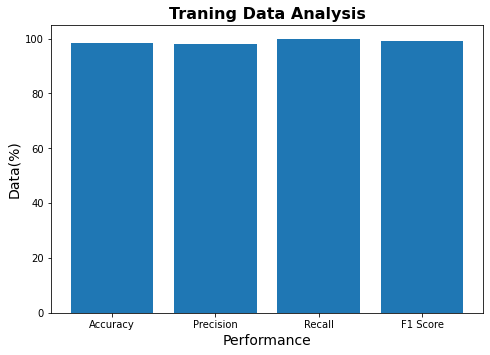

In [ ]:
#Code for graph
fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
performance=['Accuracy','Precision','Recall', 'F1 Score']
data=[accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(performance,data)
plt.title('Traning Data Analysis',fontsize=16,weight='bold')
plt.xlabel('Performance',fontsize=14)
plt.ylabel('Data(%)',fontsize=14)
plt.show()


**Test Data Analysis**

In [ ]:
accuracy_value= accuracy_on_test_data*100
precision_value = precision_score(Y_test, prediction_on_test_data)*100
recall_value = recall_score(Y_test, prediction_on_test_data)*100
f1_score_value = f1_score(Y_test, prediction_on_test_data)*100

print('Accuracy =',accuracy_value,'%')
print('Precision =',precision_value,'%')
print('Recall =',recall_value,'%')
print('F1 Score =',f1_score_value,'%')

Accuracy = 97.30941704035875 %
Precision = 96.9758064516129 %
Recall = 100.0 %
F1 Score = 98.4646878198567 %


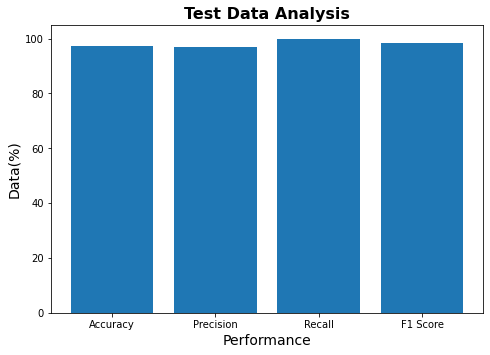

In [ ]:
#Code for graph
fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
# ax1=plt.subplot(111)
performance=['Accuracy','Precision','Recall', 'F1 Score']
data=[accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(performance,data)
plt.title('Test Data Analysis',fontsize=16,weight='bold')
plt.xlabel('Performance',fontsize=14)
plt.ylabel('Data(%)',fontsize=14)

plt.show()


**Confusion Matrix Train**

In [ ]:
print(Y_train.value_counts())
print(Y_test.value_counts())

1    3863
0     594
Name: Category, dtype: int64
1    962
0    153
Name: Category, dtype: int64


**Logistic Regression**

In [ ]:
log_model = LogisticRegression()

**Evalutation Of Training Model**

In [ ]:
# prediction on training data
log_model.fit(X_train_features, Y_train)

prediction_on_training_data = log_model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)
confusion_matrix(Y_train, prediction_on_training_data)

Accuracy on training data :  0.9672425398249944


array([[ 451,  143],
       [   3, 3860]])

**Analysis**

In [ ]:
  accuracy_value= accuracy_on_training_data*100
  precision_value = precision_score(Y_train, prediction_on_training_data)*100
  recall_value = recall_score(Y_train, prediction_on_training_data)*100
  f1_score_value = f1_score(Y_train, prediction_on_training_data)*100

  print('Accuracy =',accuracy_value,'%')
  print('Precision =',precision_value,'%')
  print('Recall =',recall_value,'%')
  print('F1 Score =',f1_score_value,'%')

Accuracy = 96.72425398249945 %
Precision = 96.42767924056957 %
Recall = 99.92234015014238 %
F1 Score = 98.1439105008899 %


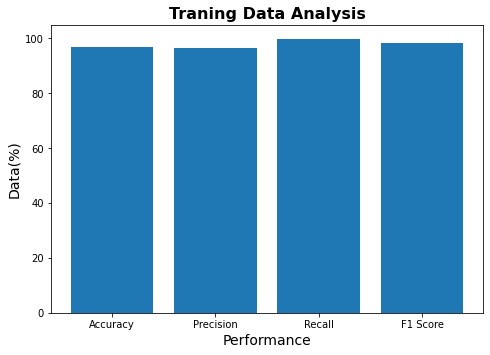

In [ ]:
#Code for graph
fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
performance=['Accuracy','Precision','Recall', 'F1 Score']
data=[accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(performance,data)
plt.title('Traning Data Analysis',fontsize=16,weight='bold')
plt.xlabel('Performance',fontsize=14)
plt.ylabel('Data(%)',fontsize=14)
plt.show()


**Evalutation of Testing Model**

In [ ]:
prediction_on_test_data = log_model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on Test data : ', accuracy_on_test_data)
confusion_matrix(Y_test, prediction_on_test_data)

Accuracy on Test data :  0.9668161434977578


array([[117,  36],
       [  1, 961]])

**Analysis**

In [ ]:
accuracy_value= accuracy_on_test_data*100
precision_value = precision_score(Y_test, prediction_on_test_data)*100
recall_value = recall_score(Y_test, prediction_on_test_data)*100
f1_score_value = f1_score(Y_test, prediction_on_test_data)*100

print('Accuracy =',accuracy_value,'%')
print('Precision =',precision_value,'%')
print('Recall =',recall_value,'%')
print('F1 Score =',f1_score_value,'%')

Accuracy = 96.68161434977578 %
Precision = 96.38916750250752 %
Recall = 99.8960498960499 %
F1 Score = 98.11128126595202 %


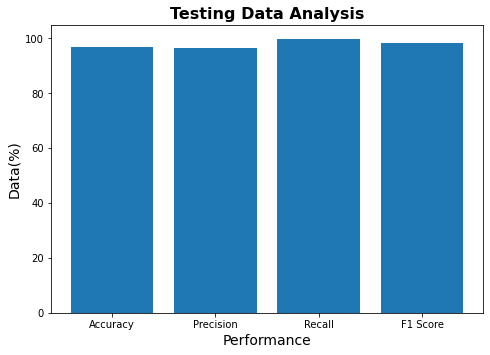

In [ ]:
#Code for graph
fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
performance=['Accuracy','Precision','Recall', 'F1 Score']
data=[accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(performance,data)
plt.title('Testing Data Analysis',fontsize=16,weight='bold')
plt.xlabel('Performance',fontsize=14)
plt.ylabel('Data(%)',fontsize=14)
plt.show()